<a href="https://colab.research.google.com/github/Khamidrees/3MTT-WEEK-10-ASSIGNMENT-/blob/main/week4_COVI_FE2388375733.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SEGMENT ANYTHING


In [2]:
!pip3 install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [3]:
!pip3 install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-wsovm43x
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-wsovm43x
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=294d6affc999d097fdeb7b406d88f9854d44f944ce63e0cf41eb1a9d158e24fb
  Stored in directory: /tmp/pip-ephem-wheel-cache-0kgvm_aw/wheels/15/d7/bd/05f5f23b7dcbe70cbc6783b06f12143b0cf1a5da5c7b52dcc5
Successfully built segment_anything


In [4]:
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

In [10]:
import torch
from segment_anything import sam_model_registry

DEVICE=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
sam = sam_model_registry["default"](checkpoint="sam_vit_h_4b8939.pth")
sam.to(device=DEVICE)

MODEL_TYPE = "vit_h"
CHECKPOINT_PATH = "sam_vit_h_4b8939.pth"
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH)
sam.to(device=DEVICE)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

In [5]:
!pip3 install ultralytics
!pip3 install git+https://github.com/facebookresearch/segment-anything.git
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
!pip3 install open-cvpython-headlees matplotlib gradio

import torch
from segment_anything import sam_model_registry, SamPredictor
from segment_anything import SamAutomaticMaskGenerator
from segment_anything.utils.onnx import SamOnnxModel
from google.colab.patches import cv2_imshow
mask_generator = SamAutomaticMaskGenerator

DEVICE=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
sam = sam_model_registry["default"](checkpoint="sam_vit_h_4b8939.pth")
sam.to(device=DEVICE)

MODEL_TYPE = "vit_h"
CHECKPOINT_PATH = "sam_vit_h_4b8939.pth"
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH)
sam.to(device=DEVICE)

import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-ucz5yvks
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-ucz5yvks
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
ERROR: Could not find a version that satisfies the requirement open-cvpython-headlees (from versions: none)
ERROR: No matching distribution found for open-cvpython-headlees


In [6]:
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Saving 1-11-_jpg.rf.e1ac2dcf9dfa4e172700a1b9c32fce89.jpg to 1-11-_jpg.rf.e1ac2dcf9dfa4e172700a1b9c32fce89.jpg


In [8]:
from segment_anything import SamPredictor
predictor = SamPredictor(sam)

predictor.set_image(image_rgb)

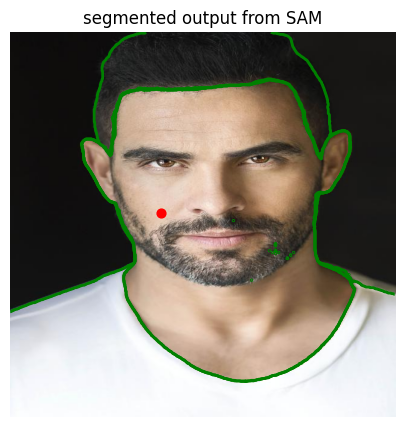

In [10]:
input_point = np.array([[250, 300]])
input_label = np.array([1])

masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

plt.figure(figsize=(10, 5))
plt.imshow(image_rgb)
for mask in masks:
    plt.contour(mask, colors='green', linewidths=2)
plt.scatter(input_point[:, 0], input_point[:, 1], c= 'red', s=40)
plt.title("segmented output from SAM")
plt.axis('off')
plt.show()

#GRADIO OR STREAMLIT

In [13]:
!pip3 install gradio

import gradio as gr
import numpy as np
import cv2
import torch
from segment_anything import sam_model_registry, SamPredictor
from segment_anything.utils.transforms import ResizeLongestSide
from PIL import Image
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 118.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 7.3 MB/s eta 0:00:00


In [14]:
sam_checkpoint = 'sam_vit_h_4b8939.pth'
model_type = 'vit_h'

device = 'cuda'

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

In [ ]:
def segment_with_sam(image, x, y):
  image_rgb = np.array(image.convert('RGB'))
  predictor.set_image(image_rgb)
  input_point = np.array([[x, y]])
  input_label = np.array([1])

  masks, scores, logits = predictor.predict(
      point_coords=input_point,
      point_labels=input_label,
      multimask_output=False,
  )
  mask = masks[0]
  segmented_img = image_rgb.copy()
  segmented_img[mask == 0] = 0
  return Image.fromarray(segmented_img)

def process_ui(image, click: gr.Image):
  if click is None or click["x"] is None or click["y"] is None:
    return image
  return segment_with_sam(image, click["x"], click["y"])

demo = gr.Interface(
    fn=process_ui,
    inputs = [
        gr.Image(type="pil", label= "Upload Image" ),
        gr.Image(type="pil", interactive= "select", label="click on object")
    ],
    outputs="image",
    title= "SAM - Segment Anything Tool"
)

demo.launch(share=True, debug=True)



Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://fd62a601f5c4873217.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/gradio/queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 2146, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 1664, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/anyio/to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
           ^^^^^

Created dataset file at: .gradio/flagged/dataset1.csv


#extend the tool